## Color_name data analysis

In [13]:
# import lib: 

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up dir
parent_directory = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = parent_directory + "/data/"


In [20]:

data = pd.read_csv(data_path+'color_names.csv', header=[0])
display(data[0:5])

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [15]:
print("number of missing entries in each column")
print(data.isna().sum())

print(" ")

print("Number of duplicated rows")
print(data.duplicated().sum())

number of missing entries in each column
Name                               0
Hex (24 bit)                       0
Red (8 bit)                        0
Green (8 bit)                      0
Blue (8 bit)                       0
Hue (degrees)                      0
HSL.S (%)                          0
HSL.L (%), HSV.S (%), HSV.V (%)    0
dtype: int64
 
Number of duplicated rows
0


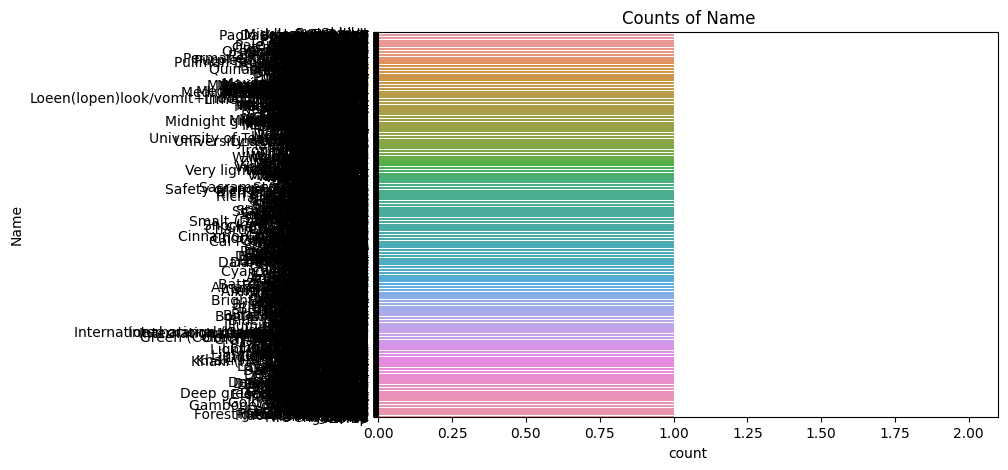

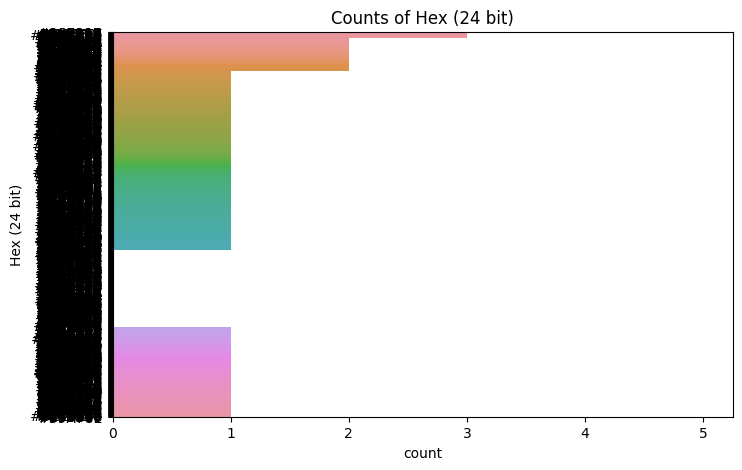

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


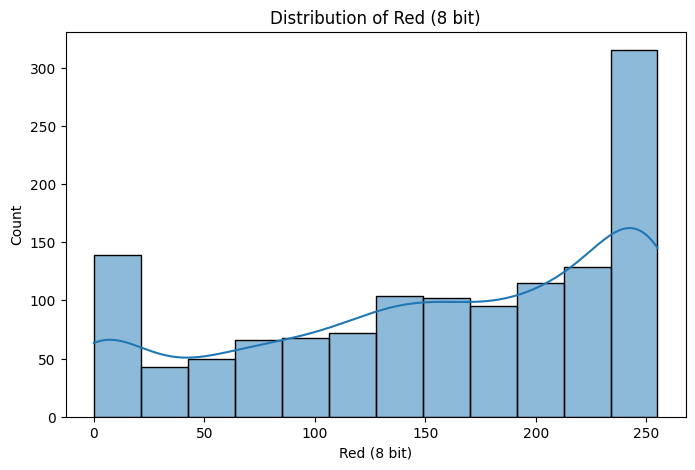

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


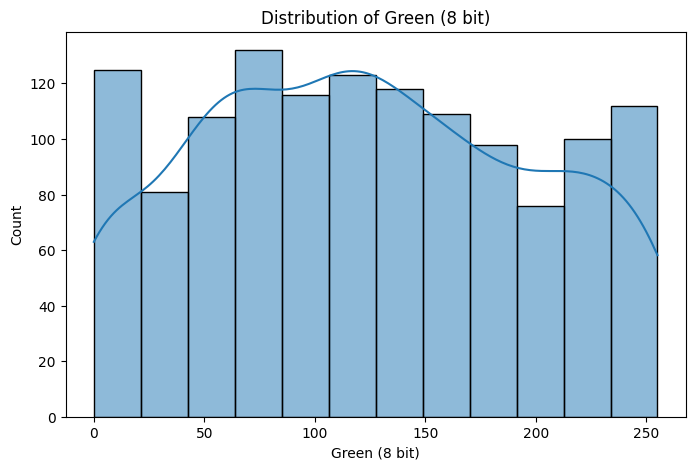

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


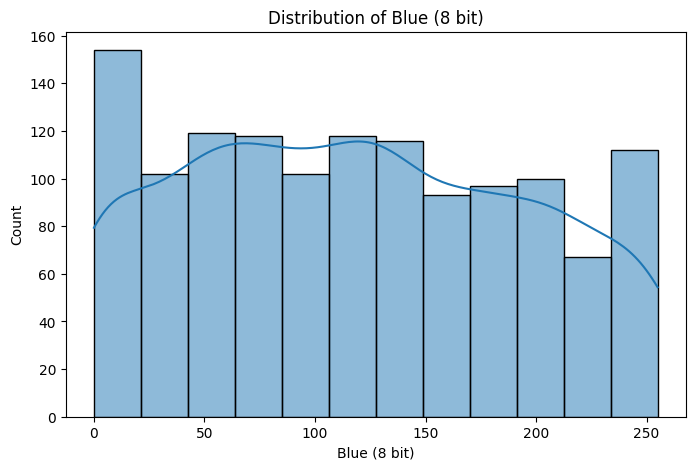

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


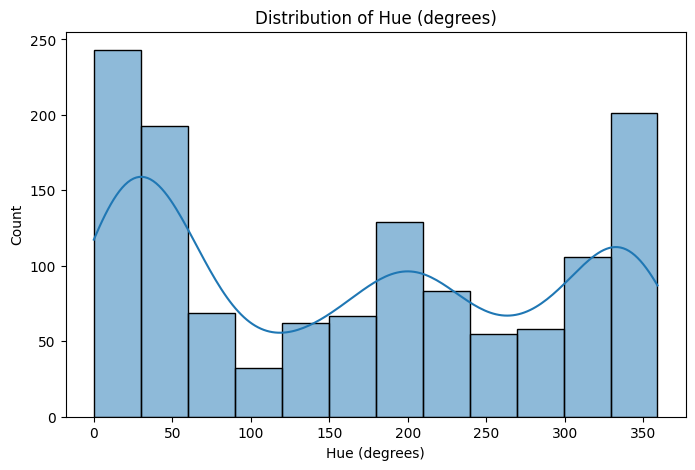

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


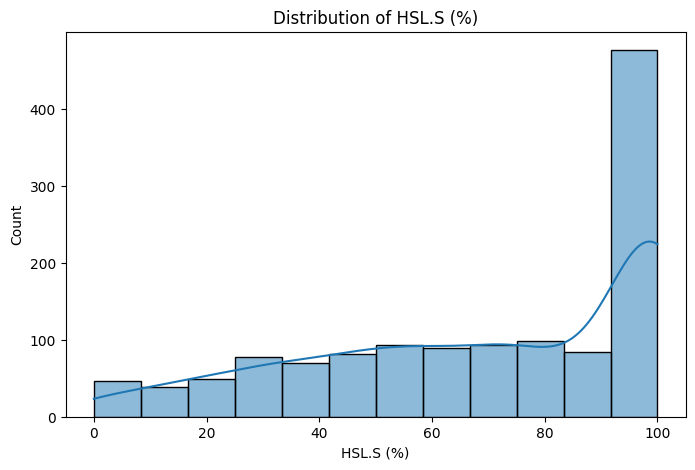

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


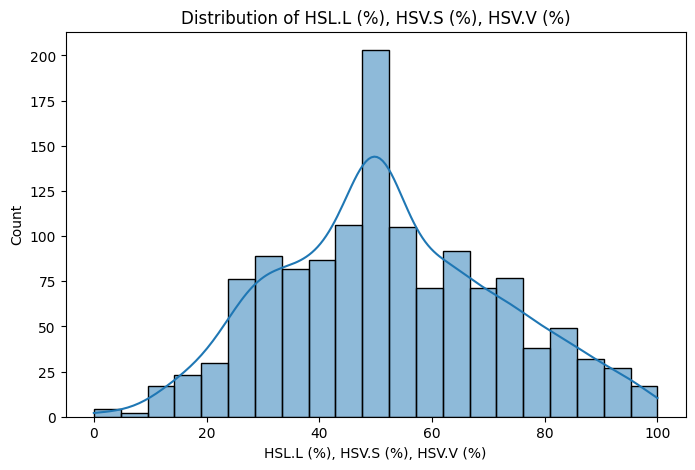

In [17]:
# Distribution of each column
for column in data.columns:
    plt.figure(figsize=(8, 5))
    if data[column].dtype in ['int64', 'float64']:
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
    elif data[column].dtype == 'object':
        sns.countplot(y=data[column], order=data[column].value_counts().index)
        plt.title(f'Counts of {column}')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

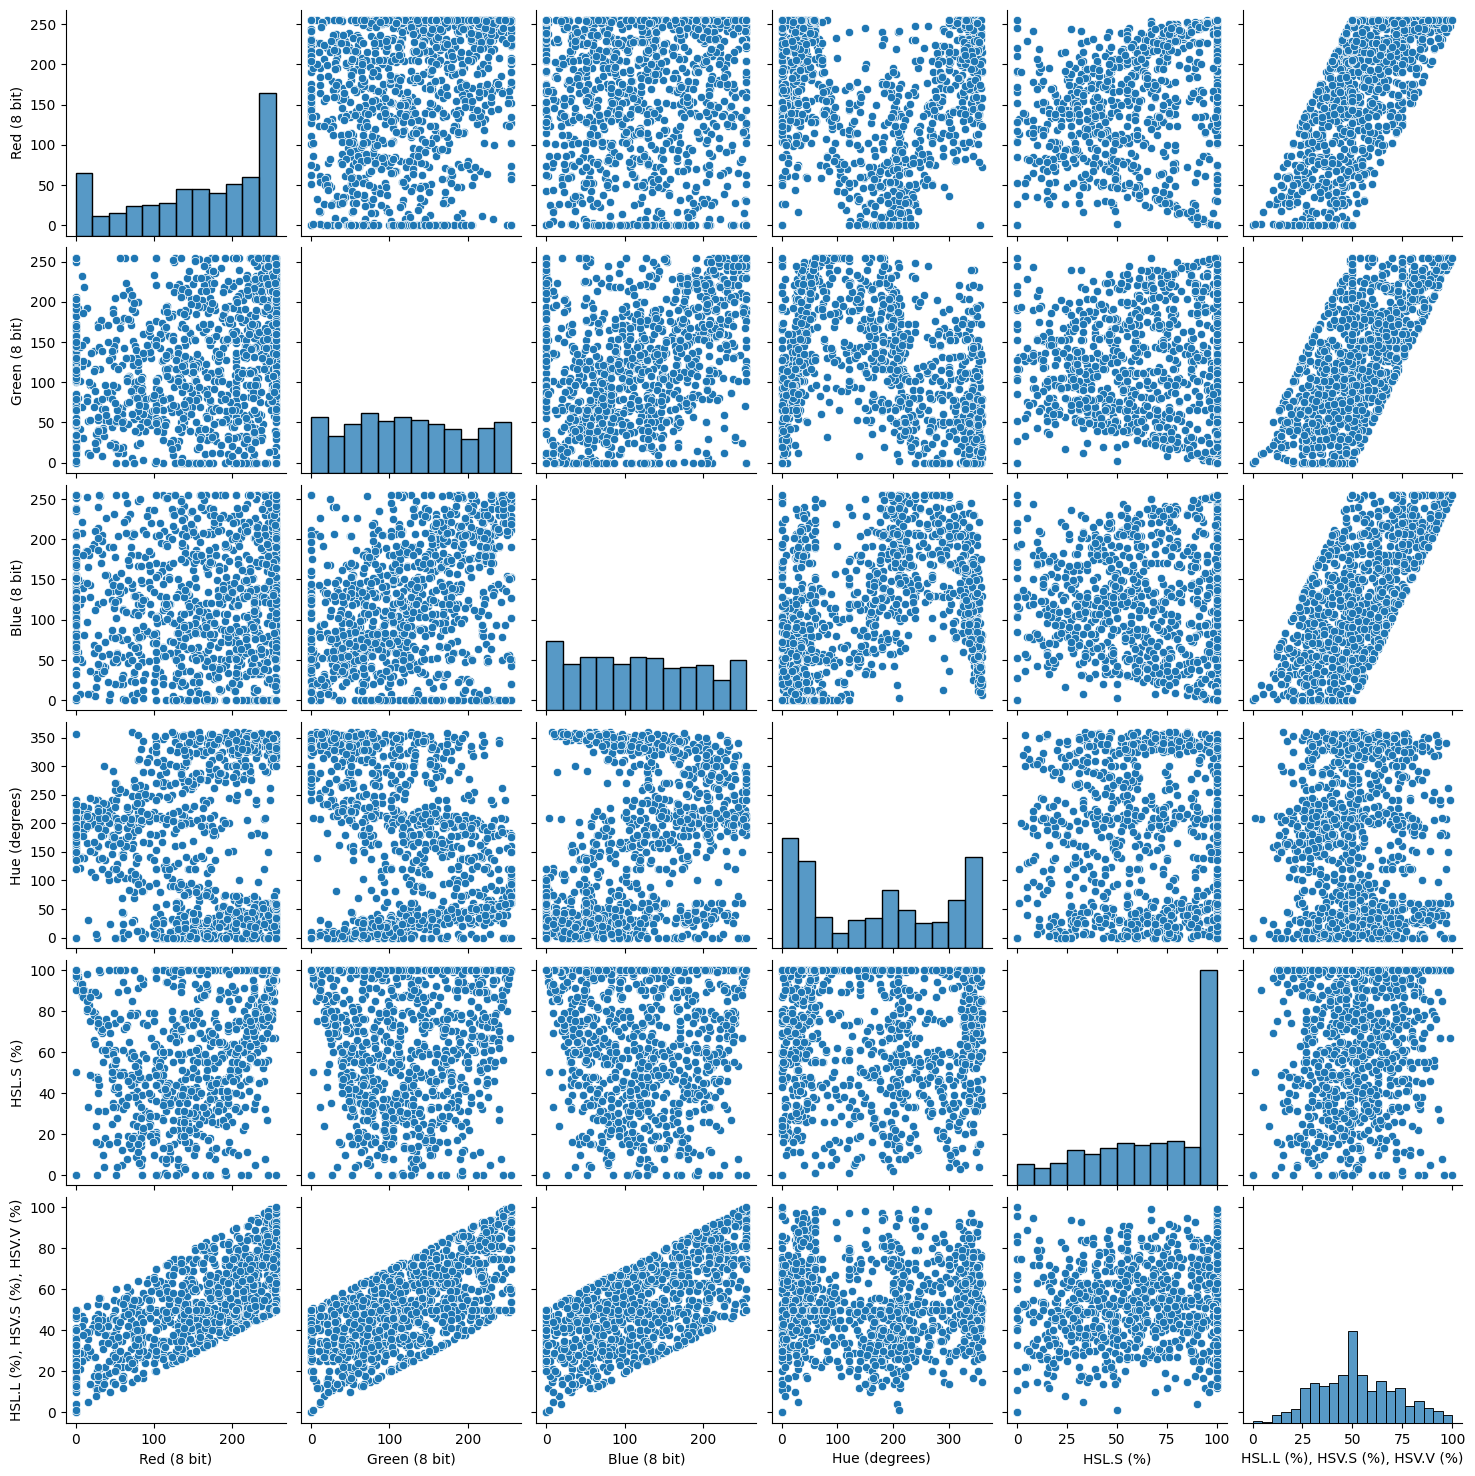

In [18]:
# Pairplot (scatterplots for numerical columns)
sns.pairplot(data)
plt.show()

## Classification

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score

print(data.columns)

# Prepare the features (X) and target (y)
X = data[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
       'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)']]
y = data['Name']  # Assuming this is the column with color names
# 'Hex (24 bit)'


# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model and cross-validator
knn_model = KNeighborsClassifier(n_neighbors=1)  # 1-NN
loo = LeaveOneOut()

# Perform LOOCV
y_true = []
y_pred = []
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    knn_model.fit(X_train, y_train)
    y_true.append(y_test[0])
    y_pred.append(knn_model.predict(X_test)[0])



# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
print("LOOCV Accuracy:", accuracy)


# Train the model on the entire dataset
knn_model.fit(X_scaled, y_encoded)

# Predict a new sample
samples = [
    [255, 0, 0, 0, 100, 50],      # Pure Red
    [0, 255, 0, 120, 100, 50],    # Pure Green
    [0, 0, 255, 240, 100, 50],    # Pure Blue
    [255, 255, 0, 60, 100, 50],   # Yellow
    [0, 255, 255, 180, 100, 50],  # Cyan
    [255, 0, 255, 300, 100, 50],  # Magenta
    [128, 128, 128, 0, 0, 50],    # Gray
    [0, 0, 0, 0, 0, 0],           # Black
    [255, 255, 255, 0, 0, 100],   # White
    [255, 165, 0, 39, 100, 50],   # Orange
    [128, 0, 128, 300, 100, 25],  # Purple
    [0, 128, 0, 120, 100, 25],    # Dark Green
    [128, 0, 0, 0, 100, 25],      # Dark Red
    [255, 192, 203, 350, 25, 88], # Pink
    [210, 105, 30, 25, 71, 47]    # Chocolate Brown
] # Example for pure red
sample_df = pd.DataFrame(samples, columns=[
    'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
    'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'
])

# Scale the sample
sample_scaled = scaler.transform(sample_df)

# Predict the color name
predicted_label = label_encoder.inverse_transform(knn_model.predict(sample_scaled))
print("Predicted Color Name:", predicted_label)

correct_label = [
    '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', 
    '#FF00FF', '#808080', '#000000', '#FFFFFF', '#FFA500', 
    '#800080', '#008000', '#800000', '#FFC0CB', '#D2691E'
]


Index(['Name', 'Hex (24 bit)', 'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
       'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'],
      dtype='object')
LOOCV Accuracy: 0.0
Predicted Color Name: ['Red' 'Electric green' 'Blue' 'Yellow' 'Electric cyan' 'Magenta' 'Gray'
 'Black' 'White' 'Orange (web)' 'Patriarch' 'Ao (English)'
 'Maroon (HTML/CSS)' 'Queen pink' 'Chocolate (web)']


In [51]:
# Example: Find the row index where the column "Name" equals 'Red'
row_index = data[data['Name'] == 'Red'].index

pred_label = []
for pred in predicted_label:
    row_index = data[data['Name'] == pred].index
    pred_label.append( data.iloc[row_index[0], 1] )

n = len(pred_label)
print("Predicted:        Correct:")
for i in range(n):
    print(pred_label[i],"          ",correct_label[i], "          ",correct_label[i]==pred_label[i])

Predicted:        Correct:
#FF0000            #FF0000            True
#00FF00            #00FF00            True
#0000FF            #0000FF            True
#FFFF00            #FFFF00            True
#00FFFF            #00FFFF            True
#FF00FF            #FF00FF            True
#808080            #808080            True
#000000            #000000            True
#FFFFFF            #FFFFFF            True
#FFA500            #FFA500            True
#800080            #800080            True
#008000            #008000            True
#800000            #800000            True
#E8CCD7            #FFC0CB            False
#D2691E            #D2691E            True


## another test:

In [52]:
samples = [
    [0, 255, 255, 180, 100, 50],  # Cyan
    [255, 0, 255, 300, 100, 50],  # Magenta
    [255, 255, 255, 0, 0, 100],   # White
    [0, 0, 0, 0, 0, 0],           # Black
    [255, 165, 0, 39, 100, 50],   # Orange
    [128, 0, 128, 300, 100, 25],  # Purple
    [255, 255, 0, 60, 100, 50],   # Yellow
    [0, 255, 0, 120, 100, 50],    # Green
    [0, 0, 255, 240, 100, 50],    # Blue
    [128, 128, 128, 0, 0, 50],    # Gray
    [255, 20, 147, 325, 100, 50], # Deep Pink
    [102, 205, 170, 160, 50, 60], # Medium Aquamarine
    [255, 105, 180, 330, 60, 70], # Hot Pink
    [255, 69, 0, 9, 100, 50],     # Red-Orange
    [123, 104, 238, 240, 80, 60], # Medium Slate Blue
]

sample_df = pd.DataFrame(samples, columns=[
    'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
    'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'
])

# Scale the sample
sample_scaled = scaler.transform(sample_df)

# Predict the color name
predicted_label = label_encoder.inverse_transform(knn_model.predict(sample_scaled))
print("Predicted Color Name:", predicted_label)

correct_label = [
    '#00FFFF', '#FF00FF', '#FFFFFF', '#000000', '#FFA500',
    '#800080', '#FFFF00', '#00FF00', '#0000FF', '#808080',
    '#FF1493', '#66CDAA', '#FF69B4', '#FF4500', '#7B68EE' ]

pred_label = []
for pred in predicted_label:
    row_index = data[data['Name'] == pred].index
    pred_label.append( data.iloc[row_index[0], 1] )

n = len(pred_label)
print("Predicted:        Correct:")
for i in range(n):
    print(pred_label[i],"          ",correct_label[i], "          ",correct_label[i]==pred_label[i])

Predicted Color Name: ['Electric cyan' 'Magenta' 'White' 'Black' 'Orange (web)' 'Patriarch'
 'Yellow' 'Electric green' 'Blue' 'Gray' 'Deep pink' 'Medium aquamarine'
 'Thulian pink' 'Orange-red' 'Medium slate blue']
Predicted:        Correct:
#00FFFF            #00FFFF            True
#FF00FF            #FF00FF            True
#FFFFFF            #FFFFFF            True
#000000            #000000            True
#FFA500            #FFA500            True
#800080            #800080            True
#FFFF00            #FFFF00            True
#00FF00            #00FF00            True
#0000FF            #0000FF            True
#808080            #808080            True
#FF1493            #FF1493            True
#66DDAA            #66CDAA            False
#DE6FA1            #FF69B4            False
#FF4500            #FF4500            True
#7B68EE            #7B68EE            True
